In [1]:
import requests
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as plot_dedogram
from requests_oauthlib import OAuth1
from sklearn.cluster import AgglomerativeClustering

In [2]:
# function to get the 50 most recent tweets having '#snl'
def get_recent_50_tweets(authentication):
    search_url = 'https://api.twitter.com/1.1/search/tweets.json?q=%23snl&result_type=recent&count=50'
    response = requests.get(search_url, auth=authentication)
    response_list = response.json()                   # list to store the response as parsed JSON text
    tweet_count = 0                                   # counter to keep track of the tweet number
    for tweet in response_list['statuses']:
        tweet_count = tweet_count + 1
        print("\nTweet no.", tweet_count,"\n" + tweet['text'])
    
    return response_list

In [9]:
# function to get the requires features of the tweets
def tweet_features(authentication, response_list):
    tweet_count = 0
    for tweet in response_list['statuses']:
        tweet_count += 1   
        print("\nTweet no.",tweet_count,"\n"+tweet['text'])
        print("\ni. number of followers of the user:",tweet['user']['followers_count'])
        print("ii. number of friends of the user:",tweet['user']['friends_count'])
        print("iii. number of tweets of the user",tweet['user']['statuses_count'])
        print("iv. number of retweets of the given tweet:",tweet['retweet_count'])
        print("v. number of favorite of the given tweet:",tweet['favorite_count'])
        print("vi. username of the given user:",tweet['user']['screen_name'],"\n")
        print("*****************************************************************************************************************************")           

In [4]:
def clustering(response_list):
    screename_list = []
    followers_list = []
    friends_list = []
    statuses_list = []
    retweet_list = []
    favorite_list = []
    for tweet in response_list['statuses']:
        screename_list.append(tweet['user']['screen_name'])
        followers_list.append(tweet['user']['followers_count'])
        friends_list.append(tweet['user']['friends_count'])
        statuses_list.append(tweet['user']['statuses_count'])
        retweet_list.append(tweet['retweet_count'])
        favorite_list.append(tweet['favorite_count'])

    data_dictionary = {'followers_count':followers_list, 'friends_count':
                   friends_list, 'statuses_count':statuses_list, 'retweet_count':retweet_list, 'favorite_count':favorite_list}
    data = pd.DataFrame(data_dictionary)
    # df = pd.read_csv('ass5_result.csv')
    # np array of datapoints
    X = np.array(data[['followers_count', 'friends_count', 'statuses_count', 'retweet_count', 'favorite_count']])
    cluster = AgglomerativeClustering(linkage = 'average').fit(X) 
    print("The cluster labels for the datapoints are:\n", cluster.labels_)
    
    plt.figure(figsize = (15, 7))
    plt.title("Tweet Dendogram")
    dendrogram = plot_dedogram.dendrogram(plot_dedogram.linkage(data, method = 'average'), labels = screename_list)

In [15]:
def main():
    print('\033[1m{:10s}\033[0m'.format('(a) AUTHENTICATING WITH THE TWITTER API'))
    
    # Access keys (credentials)
    CONSUMER_KEY = '1yhCZq7X8qQPSCxqS1hy3fGhk'
    CONSUMER_SECRET = 'kwOHfz2pV2zcmdPkqXCWd6O8v8HYgmN7TTMZp3eyyYEXLIKvhn'
    TOKEN_KEY = '1173328015796899840-x1vIeYZFlfNwH2tvAVNUn8zrQWmvf5'
    TOKEN_SECRET = 'JUHxnyFvawMhnYcjZIzyN1l6q3QYFPzm6d9Jfm0XeXOYB'
    
    verify_url = 'https://api.twitter.com/1.1/account/verify_credentials.json'
    authentication = OAuth1(CONSUMER_KEY, CONSUMER_SECRET, TOKEN_KEY, TOKEN_SECRET)
    check_authentication_response = requests.get(verify_url, auth = authentication)  # variable to store the response for the request
    
    #if response.status code equals 200 which is 'OK', the authentication is successful
    if (check_authentication_response.status_code == 200):
        print('\n\tSuccessfully authenticated with Twitter API!')
    else:
        print('Failure in authentication :(')
    print('\n=============================================================================================================================')           
    
    print('\033[1m{:10s}\033[0m'.format('(b) USING THE TWITTER STANDARD SEARCH API, QUERING THE MOST RECENT 50 TWEETS THAT HAVE THE #snl HASHTAG'))
    response_list = get_recent_50_tweets(authentication)
    print('\n=============================================================================================================================')           
    
    print('\033[1m{:10s}\033[0m'.format('(c) EXTRACTING 6 FEATURES FROM EACH TWEET'))
    tweet_features(authentication, response_list)
    
    print('\033[1m{:10s}\033[0m'.format('(d) USING THE FIRST FIVE FEATURES (I-V) PREVIOUSLY BUILT, PERFORMS HIERARCHICAL AGGLOMERATIVE CLUSTERING (WITH AVERAGE LINKAGE) ON THE DATA AND PLOT THE DENDOGRAM, USING THE SCREEN NAME OF THE USER (FEATURE VI) AS A LABEL FOR THE DATA.\n'))   
    clustering(response_list)

(a) AUTHENTICATING WITH THE TWITTER API

	Successfully authenticated with Twitter API!

(b) USING THE TWITTER STANDARD SEARCH API, QUERING THE MOST RECENT 50 TWEETS THAT HAVE THE #snl HASHTAG

Tweet no. 1 
RT @JoAnneHnyc: Starting next week, there will be a circle with Harry’s face in it, where you can find all the clips of his sketches, and m…

Tweet no. 2 
RT @With1DNews: Harry sending fruit to the #SNL line: the saga https://t.co/mwMKfnxfYX

Tweet no. 3 
RT @With1DNews: Harry sending fruit to the #SNL line: the saga https://t.co/mwMKfnxfYX

Tweet no. 4 
RT @Splitsider: "I needed those 20 years to recover from what had happened in New Orleans." In 1977, Lorne Michaels took #SNL to New Orlean…

Tweet no. 5 
RT @Splitsider: "I needed those 20 years to recover from what had happened in New Orleans." In 1977, Lorne Michaels took #SNL to New Orlean…

Tweet no. 6 
"I needed those 20 years to recover from what had happened in New Orleans." In 1977, Lorne Michaels took #SNL to Ne… https://t.

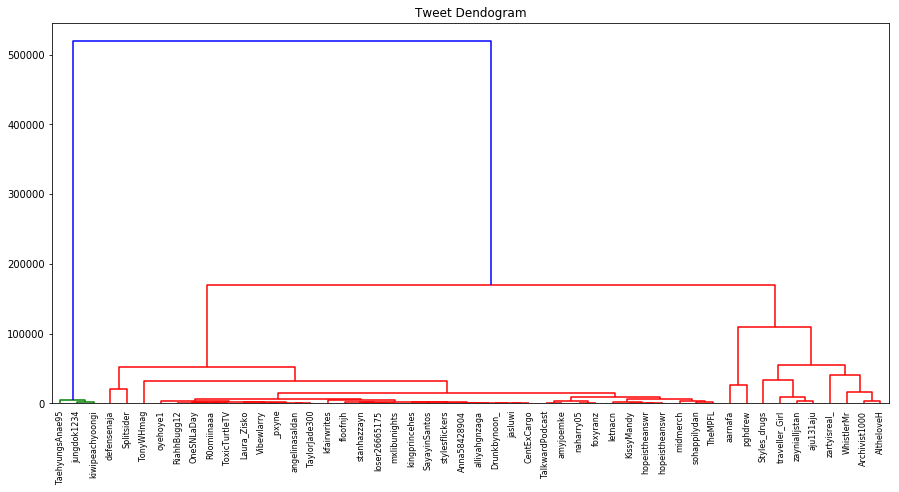

In [16]:
if __name__== "__main__":
    main()